In [80]:
import pandas as pd
import numpy as np
from datetime import datetime

column_names=["year","month","day","hour","ws"]
dtype={"year":int,"month":int,"day":int,"hour":int,"ws":float}

datafile='/home/sophie/projects/windspeed/data/61401BirMoghrein_allwinds.txt'

#specify the columns you want to group together. Can't include hour at this point as it is not in the right format. 
date_spec = {'date_time': [0,1,2]}

#when you use keep_dat_col it keeps them as objects, not as the dtype you read them in as.
wind = pd.read_csv(datafile, sep=" ", names=column_names, parse_dates=date_spec, keep_date_col=True, index_col=False ) 

#Dealing with hour - going from 600, 1200 etc to 6,12, 18
wind["hour"]=(wind["hour"]/100).astype(int)

#combining year, month, day that were parsed together into date_time with hour, which is now in the correct format.
wind['date_time'] = pd.to_datetime(wind.date_time) + wind.hour.astype('timedelta64[h]')

#First need to change year,month, day into ints
wind[['year','month','day']]=wind[['year','month','day']].astype(int)

print year[0:5]

0    1984
1    1984
2    1984
3    1984
4    1984
Name: year, dtype: int64


Make two dataframes: <br /> 
1) Year averaged  <br /> 
2) Month averaged <br /> 
Make plots with the error bars as filled in block.

In [81]:
#group by month and year
grouped_month = wind.groupby(['year','month'])
grouped_year = wind.groupby(['year'])

#create two different objects as the differently binned arrays will have different lengths.
wind_bymonth = grouped_month['ws'].aggregate([np.mean,np.std])
wind_byyear = grouped_year['ws'].aggregate([np.mean,np.std])

year_new =[] 

#Loop over the MultiIndex and create a datetime object for each row
for i in range(0,len(wind_bymonth)):
    year_n, month_n = wind_bymonth.index[i]     
    year_new.append(datetime(year_n,month_n,1))
    
#Change the index of w to our new datetime objects
wind_bymonth.index = year_new


In [82]:
#can only run this cell once. Gets messed up otherwise.
#create another empty year_new
year_new=[]
#Do the same, for the yearly averaged data
for i in range(0,len(wind_byyear)):
    year_n = wind_byyear.index[i]
    year_new.append(datetime(year_n,1,1))
    
#Change the index of w to our new datetime objects
wind_byyear.index = year_new

Now to try plotting these differently averaged subsets

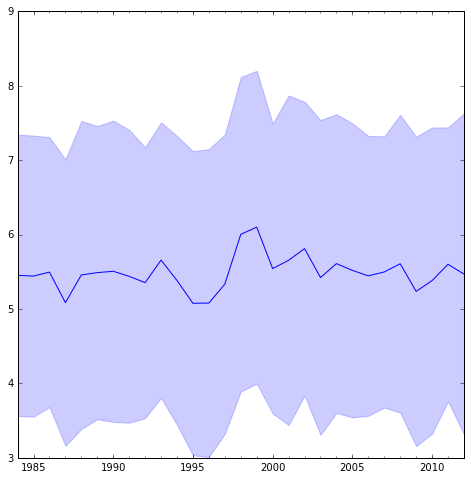

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

#Averaging by year
wind_byyear['mean'].plot(figsize=(8,8))

plt.fill_between(wind_byyear.index, (wind_byyear['mean'] + wind_byyear['std']), \
                 (wind_byyear['mean'] - wind_byyear['std']), color = 'b', alpha = 0.2) 

Not surprisingly there is huge std when you average observations over a whole year! 

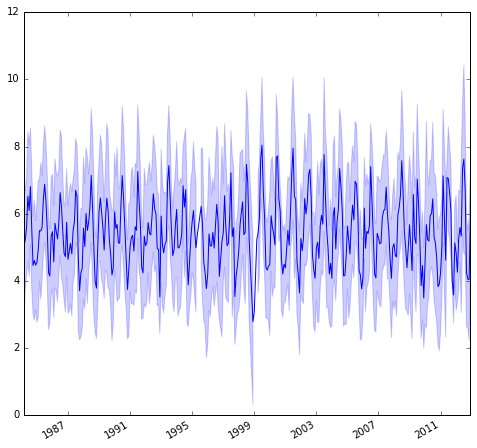

In [85]:
#Averaging by month
wind_bymonth['mean'].plot(figsize=(8,8))

plt.fill_between(wind_bymonth.index, (wind_bymonth['mean'] + wind_bymonth['std']), \
                 (wind_bymonth['mean'] - wind_bymonth['std']), color = 'b', alpha = 0.2) 

Lets zoom in on a period - std disappears sometime just after 1995. Wonder why that is.

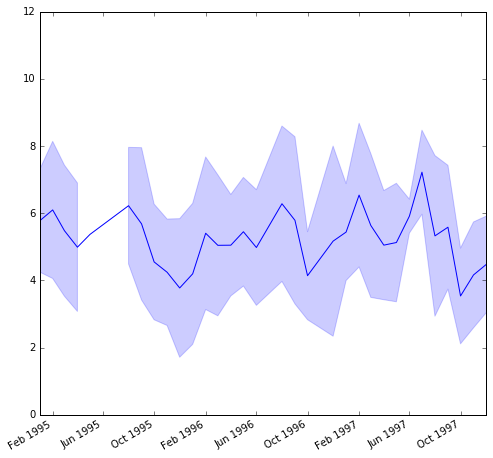

In [86]:
wind_bymonth['mean']['1995':'1997'].plot(figsize=(8,8))

plt.fill_between(wind_bymonth.index, (wind_bymonth['mean'] + wind_bymonth['std']), \
                 (wind_bymonth['mean'] - wind_bymonth['std']), color = 'b', alpha = 0.2) 

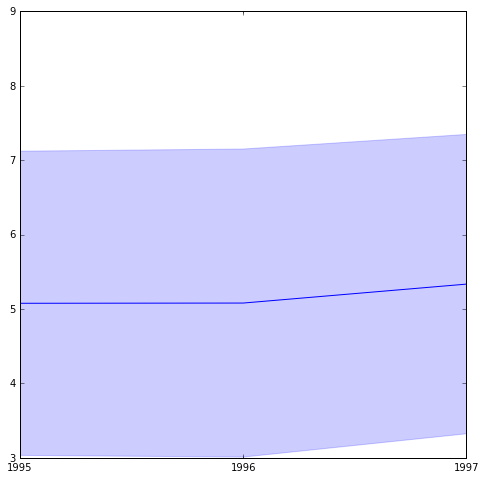

In [88]:
wind_byyear['mean']['1995':'1997'].plot(figsize=(8,8))

plt.fill_between(wind_byyear.index, (wind_byyear['mean'] + wind_byyear['std']), \
                 (wind_byyear['mean'] - wind_byyear['std']), color = 'b', alpha = 0.2)

Lets compare the difference between monthly and yearly averaged for this period. 

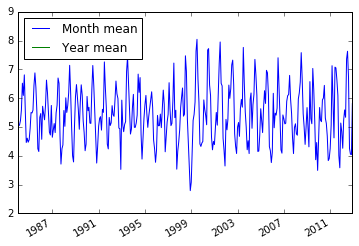

In [89]:
#DOESN'T WORK.
#they can't be compared as the two arrays have different lengths.
compare = pd.DataFrame({'Year mean':wind_byyear['mean'], 'Month mean':wind_bymonth['mean']})

compare.plot()

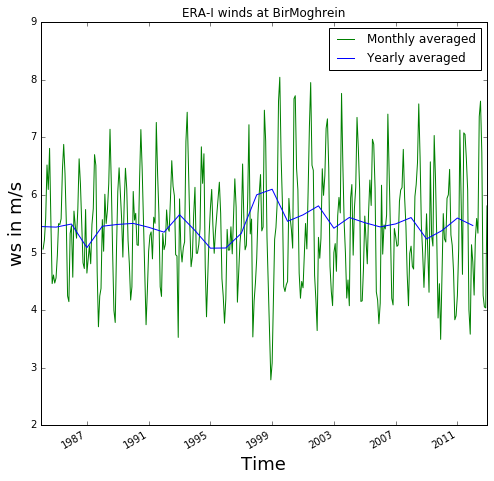

In [101]:
#maybe just try plotting both onto the same plot
#Not sure why, but the order in which I plotted made a difference. 
wind_bymonth['mean'].plot(figsize=(8,8), c = 'g',legend=True, label='Monthly averaged')
wind_byyear['mean'].plot(figsize=(8,8), legend=True, label='Yearly averaged')

plt.xlabel('Time', fontsize=18)
plt.ylabel('ws in m/s', fontsize=18)
plt.title('ERA-I winds at BirMoghrein')

More things to do:   
- Work out if there is a trend in the data.
- Should we discard the data around 1999 - what is going on there? Is there a drop out at a certain time of day?
    - To work that out could plot the number of observations at each time of day as a timeseries
- Create these plots for groups. Print out as a panel of each station individually, then the group mean. Need to make a script to do that. 
